In [1]:
# Change colour of curve according to its y-value in matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(2*x)
plt.scatter(x,y, c=cm.hot(np.abs(y)), edgecolor='none')

In [2]:
# Change colour of curve according to its y-value in matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

x = np.random.random_sample((100,))
x = np.sort(x)
y = x + np.sin(np.pi * x)
z = 5 * x

fig = plt.figure()
plot = plt.scatter(x, y, s= 10, c = z, cmap='coolwarm')
fig.colorbar(plot)
plt.grid(True, 'both')

# add another scatterplot
x_line = np.linspace(np.min(x), np.max(x), num=1000)
y_line = x_line + np.sin(np.pi * x_line)
z_line = 5 * x_line
plt.scatter(x_line, y_line, c=z_line, s=0.1, cmap='coolwarm')

plt.show()

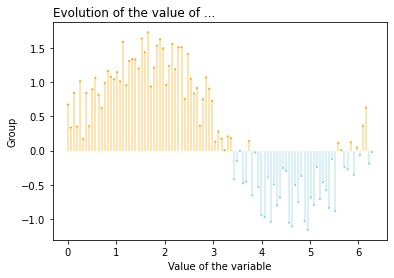

In [12]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# Data
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.uniform(size=len(x)) - 0.2
 
# Create a color if the y axis value is equal or greater than 0
my_color = np.where(y>=0, 'orange', 'skyblue')
 
# The vertical plot is made using the vline function
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
# plt.plot(x,y, color=my_color, alpha=1)

# Add title and axis names
plt.title("Evolution of the value of ...", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the graph
plt.show()


In [20]:
# generate data
x = np.arange(0, 8*np.pi, 0.1)
y = np.sin(x)

# cutoff value
cutoff = 0

# generate color list
colors=['red' if val < cutoff else 'blue' for val in y]

# create trace
trace = go.Scatter(
    x=x, 
    y=y, 
    mode='markers+lines', 
    marker={'color': colors}, 
    line={'color': 'gray'}
)



# crate figure, plot 
fig = go.Figure(data=trace)
fig.show()



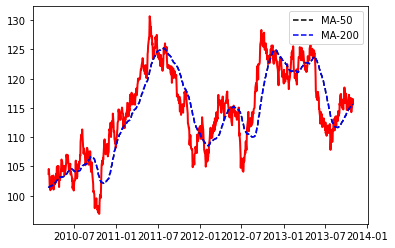

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# simulate data
# =============================
np.random.seed(1234)
df = pd.DataFrame({'px_last': 100 + np.random.randn(1000).cumsum()}, index=pd.date_range('2010-01-01', periods=1000, freq='B'))
df['50dma'] = df['px_last'].rolling(window=50, center=False).mean()
df['200dma'] = df['px_last'].rolling(window=50, center=False).mean()
#df['50dma'] = pd.rolling_mean(df['px_last'], window=50)
#df['200dma'] = pd.rolling_mean(df['px_last'], window=200)
df['label'] = np.where(df['50dma'] > df['200dma'], 1, -1)


# plot
# =============================
df = df.dropna(axis=0, how='any')

fig, ax = plt.subplots()

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.plot(group.index, group.px_last, c=color, linewidth=lw)

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

# add ma lines
ax.plot(df.index, df['50dma'], 'k--', label='MA-50')
ax.plot(df.index, df['200dma'], 'b--', label='MA-200')
ax.legend(loc='best')


px_last       50dma      200dma                 label  color
2010-10-07   98.495816  105.086131  103.572243  |50dma - 200dma| < 3  green
2010-10-08   98.176255  104.855675  103.560767  |50dma - 200dma| < 3  green
2010-10-11   97.556262  104.596886  103.552146  |50dma - 200dma| < 3  green
2010-10-12   97.713260  104.350719  103.537146  |50dma - 200dma| < 3  green
2010-10-13   97.141805  104.094256  103.520853  |50dma - 200dma| < 3  green
...                ...         ...         ...                   ...    ...
2013-10-25  114.542595  115.356251  117.763573  |50dma - 200dma| < 3  green
2013-10-28  115.474141  115.426927  117.739039  |50dma - 200dma| < 3  green
2013-10-29  115.801673  115.498307  117.720920  |50dma - 200dma| < 3  green
2013-10-30  116.542487  115.557763  117.707175  |50dma - 200dma| < 3  green
2013-10-31  115.740582  115.606045  117.694806  |50dma - 200dma| < 3  green

[801 rows x 5 columns]

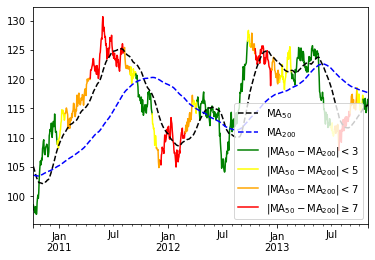

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Simulate data
np.random.seed(1234)
df = pd.DataFrame(
    {'px_last': 100 + np.random.randn(1000).cumsum()},
    index=pd.date_range('2010-01-01', periods=1000, freq='B'),
)

df['50dma'] = df['px_last'].rolling(window=50, center=False).mean()
df['200dma'] = df['px_last'].rolling(window=200, center=False).mean()

## Apply labels
df['label'] = 'out of bounds'
df.loc[abs(df['50dma'] - df['200dma']) >= 7, 'label'] = '|50dma - 200dma| >= 7'
df.loc[abs(df['50dma'] - df['200dma']) < 7, 'label'] = '|50dma - 200dma| < 7'
df.loc[abs(df['50dma'] - df['200dma']) < 5, 'label'] = '|50dma - 200dma| < 5'
df.loc[abs(df['50dma'] - df['200dma']) < 3, 'label'] = '|50dma - 200dma| < 3'
df = df[df['label'] != 'out of bounds']

## Convert labels to colors
label2color = {
    '|50dma - 200dma| < 3': 'green',
    '|50dma - 200dma| < 5': 'yellow',
    '|50dma - 200dma| < 7': 'orange',
    '|50dma - 200dma| >= 7': 'red',
}
df['color'] = df['label'].apply(lambda label: label2color[label])
display(df)

# Create plot
fig, ax = plt.subplots()

def gen_repeating(s):
    """Generator: groups repeated elements in an iterable
    E.g.
        'abbccc' -> [('a', 0, 0), ('b', 1, 2), ('c', 3, 5)]
    """
    i = 0
    while i < len(s):
        j = i
        while j < len(s) and s[j] == s[i]:
            j += 1
        yield (s[i], i, j-1)
        i = j

## Add px_last lines
for color, start, end in gen_repeating(df['color']):
    if start > 0: # make sure lines connect
        start -= 1
    idx = df.index[start:end+1]
    df.loc[idx, 'px_last'].plot(ax=ax, color=color, label='')

## Add 50dma and 200dma lines
df['50dma'].plot(ax=ax, color='k', ls='--', label='MA$_{50}$')
df['200dma'].plot(ax=ax, color='b', ls='--', label='MA$_{200}$')

## Get artists and labels for legend and chose which ones to display
handles, labels = ax.get_legend_handles_labels()

## Create custom artists
g_line = plt.Line2D((0,1),(0,0), color='green')
y_line = plt.Line2D((0,1),(0,0), color='yellow')
o_line = plt.Line2D((0,1),(0,0), color='orange')
r_line = plt.Line2D((0,1),(0,0), color='red')

## Create legend from custom artist/label lists
ax.legend(
    handles + [g_line, y_line, o_line, r_line],
    labels + [
        '|MA$_{50} - $MA$_{200}| < 3$',
        '|MA$_{50} - $MA$_{200}| < 5$',
        '|MA$_{50} - $MA$_{200}| < 7$',
        '|MA$_{50} - $MA$_{200}| \geq 7$',
    ],
    loc='best',
)

# Display plot
plt.show()

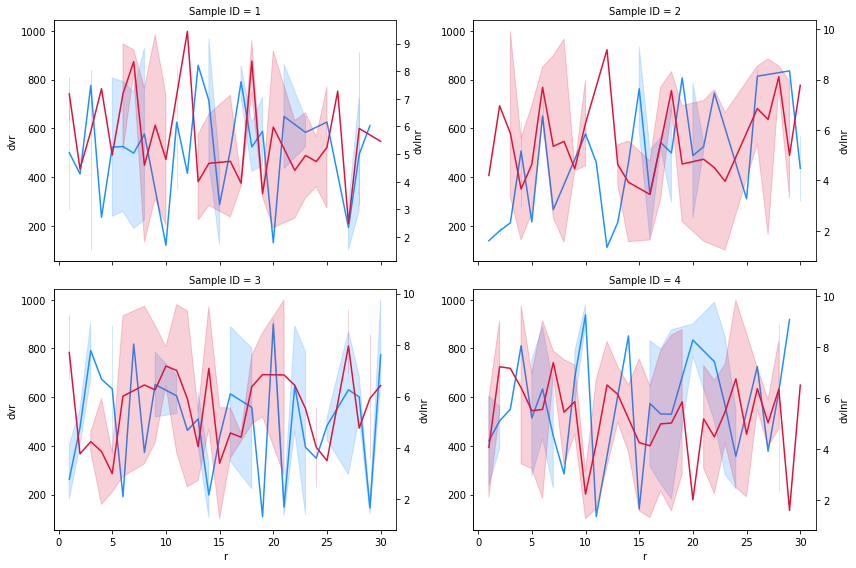

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'r': np.random.randint(1, 31, 200),
                    'dvr': np.random.uniform(100, 1000, 200),
                    'Sample ID': np.random.randint(1, 5, 200)})
df2 = pd.DataFrame({'r': np.random.randint(1, 31, 300),
                    'dvlnr': np.random.uniform(1, 10, 300),
                    'Sample ID': np.random.randint(1, 5, 300)})

g = sns.relplot(data=df1, x='r', y='dvr', col='Sample ID', col_wrap=2, kind="line", height=4, aspect=1.5,
                color='dodgerblue')

for sample_id, ax in g.axes_dict.items():  # axes_dict is new in seaborn 0.11.2
    ax1 = ax.twinx()
    sns.lineplot(data=df2[df2['Sample ID'] == sample_id], x='r', y='dvlnr', color='crimson', ax=ax1)

plt.tight_layout()
plt.show()

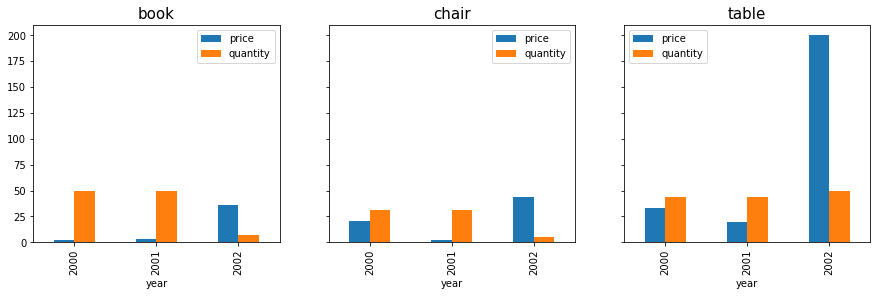

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

dicts = []
dicts.append({'item':'book','year':2000,'price':2, 'quantity':50})
dicts.append({'item':'table','year':2000,'price':33, 'quantity':44})
dicts.append({'item':'chair','year':2000,'price':21, 'quantity':31})

dicts.append({'item':'book','year':2001,'price':3, 'quantity':50})
dicts.append({'item':'table','year':2001,'price':20, 'quantity':44})
dicts.append({'item':'chair','year':2001,'price':2, 'quantity':31})

dicts.append({'item':'book','year':2002,'price':36, 'quantity':7})
dicts.append({'item':'table','year':2002,'price':200, 'quantity':50})
dicts.append({'item':'chair','year':2002,'price':44, 'quantity':5})

df = pd.DataFrame.from_records(dicts)

grouped = df.groupby('item')

fig, axes = plt.subplots(1,3,sharey=True)

fig.set_size_inches(15,4)

for i,group_key in enumerate(list(grouped.groups.keys())):
    grouped.get_group(group_key).set_index('year').plot(kind='bar',ax = axes[i])
    axes[i].set_title(group_key,fontsize=15)

In [7]:
import plotly.graph_objects as go

fig = go.Figure()

config = {'scrollZoom': True}

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.show(config=config)

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.update_layout(modebar_remove=['zoom', 'pan'])

fig.show()